# Coding Project Analysis JEM Forms


### Data Output: Date, Specimen ID, Rig Opertator, Layer, Cell Type Prediction (Human), Patch Duration(min)

In [1]:
import os
import csv
import json
import fnmatch
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import JEM_post_patch as pp #post patch script
#post_patch_column = 'extraction.postPatch'
#post_patch_pipette_column = 'extraction.endPipetteR'

from pandas.io.json import json_normalize
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.options.display.max_columns = None  #Displays all the columns 

#Used csv from 5/25/2018
shiny_human_df = pd.read_csv('C:/users/ramr/documents/github/personal-projects/csv/shiny_human.csv')
shiny_mouse_df = pd.read_csv('C:/users/ramr/documents/github/personal-projects/csv/shiny_mouse.csv')

In [3]:
def gen_fil(df, col, cond):
    '''
    Filters the column with a certain condition
    df: dataframe
    col: column
    cond: condition
    '''
    filtered = df[df[col] == cond]
    return filtered

In [4]:
def get_jsons(dirname, expt):
    json_paths = []
    for jfile in os.listdir(dirname):
        if fnmatch.fnmatch(jfile, '*.%s.json' %expt):
            jpath = os.path.join(dirname, jfile)
            json_paths.append(jpath)
    return json_paths

In [5]:
#make list of json paths for every json file in MIES Experiments directory on 279
json_list = get_jsons("//allen/programs/celltypes/workgroups/279/Patch-Seq/all-metadata-files/", "PS")
#json_list

In [6]:
def flatten_attempts(slice_info, form_version):
    """Return flattened slice metadata dataframe.
    
    Parameters
    ----------
    slice_info : dict
        A dictionary of slices with nested pipette attempts.
    
    form_version : string
        A string containing the JEM form version.
        (Pre-version 2 contains IVSCC, PatchSeq and Electroporation arrays)
    Returns
    -------
    attempts_slice_df : pandas dataframe
        A dataframe of all pipette attempts along with all slice metadata.
    """
    
    df = json_normalize(slice_info)
    if form_version >= "2":
        ps_array_name = "pipettes"
    else:
        ps_array_name = "pipettesPatchSeqPilot"
    try:
        attempts_df = json_normalize(slice_info[ps_array_name])
        attempts_df["limsSpecName"] = df["limsSpecName"].values[0]
        attempts_df["attempt"] = [p+1 for p in attempts_df.index.values]
        attempts_slice_df = pd.merge(df, attempts_df, how="outer", on="limsSpecName")
        attempts_slice_df.drop(ps_array_name, axis=1, inplace=True)
        return attempts_slice_df
    except IndexError:
        pass

def is_field(df, colname):
    """Determine whether a column name exists in a dataframe.
    
    Parameters
    ----------
    df : a Pandas dataframe
    colname : string
        
    Returns
    -------
    Boolean
        Boolean value indicating if the colname exists in the dataframe.
    """
    
    try:
        df[colname]
        return True
    except KeyError:
        return False

### json_df

In [7]:
json_df = pd.DataFrame()

for json_path in json_list:
    with open(json_path) as data_file:
        slice_info = json.load(data_file)
        if is_field(slice_info, "formVersion"):
            jem_version = slice_info["formVersion"]
        else:
            jem_version = "1.0.0"
        flat_df = flatten_attempts(slice_info, jem_version)
        json_df = pd.concat([json_df, flat_df], axis=0)

In [8]:
#Creates patch_duration column and outputs in minutes
json_df['patch_duration'] = pd.to_datetime(json_df['extraction.timeRetractionEnd']) - pd.to_datetime(json_df['recording.timeWholeCellStart'])
json_df['patch_duration'] = (json_df['patch_duration'].astype('timedelta64[s]'))/60
json_df

,acsfProductionDate,approach.anatomicalLocation,approach.autoRoi,approach.cellHealth,approach.corticalLayer,approach.creCell,approach.depth,approach.detailedLocation,approach.manualRoi,approach.otherPilotName,approach.pilotName,approach.pilotTest01,approach.pilotTest03,approach.pilotTest04,approach.pilotTest05,approach.sliceHealth,attempt,autoRoi,badSweeps,blankFillDate,date,depth,experimentType,extraction.bfiWitness,extraction.endPipetteR,extraction.extractionNotes,extraction.extractionObservations,extraction.nucleus,extraction.postPatch,extraction.pressureApplied,extraction.retractionPressureApplied,extraction.sampleObservations,extraction.timeEnd,extraction.timeExtractionEnd,extraction.timeExtractionStart,extraction.timeRetractionEnd,extraction.timeRetractionStart,extraction.tubeID,failureCause,failureNotes,flipped,formVersion,freeFailureNotes,internalFillDate,internalSolution.concentrationAlexa,internalSolution.concentrationBiocytin,internalSolution.concentrationRnaseInhibitor,internalSolution.version,internalSolution.volume,limsSpecName,manualRoi,pipetteSpecName,qcNotes,recording.accessR,recording.humanCellTypePrediction,recording.membraneV,recording.pipetteR,recording.rheobase,recording.timeStart,recording.timeWholeCellStart,rigNumber,rigOperator,sliceNotes,sliceQuality,status,successNotes,wellID,patch_duration
0,2018-04-18,NaN,NaN,3,NaN,Cre+,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,2,1.0,None,NaN,2018-03-22,2018-04-18 13:17:02 -07:00,-50,NaN,NaN,1000,NaN,NaN,no,nucleus_absent,-80.0,-80.0,NaN,NaN,13:20:14 -07:00,13:20:13 -07:00,13:20:14 -07:00,NaN,PXS4_180418_551_A01,NaN,NaN,No,2.0.3,NaN,2018-03-29,NaN,NaN,NaN,NaN,NaN,Sim1-Cre_KJ18;Ai139;Sst-IRES-FlpO;Ai65F-386176...,VISp5,NaN,NaN,NaN,NaN,NaN,6,NaN,13:19:59 -07:00,13:20:00 -07:00,MP2,pashad,NaN,Damaged,SUCCESS,NaN,NaN,0.233333
1,2018-04-18,NaN,NaN,2,NaN,Cre+,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,2,2.0,None,NaN,2018-03-22,2018-04-18 13:17:02 -07:00,-50,NaN,NaN,1000,NaN,NaN,NaN,nucleus_present,-80.0,-80.0,NaN,NaN,13:21:44 -07:00,13:21:44 -07:00,13:21:45 -07:00,NaN,PXS4_180418_552_A01,NaN,NaN,No,2.0.3,NaN,2018-03-29,NaN,NaN,NaN,NaN,NaN,Sim1-Cre_KJ18;Ai139;Sst-IRES-FlpO;Ai65F-386176...,VISp5,NaN,NaN,NaN,NaN,NaN,6,NaN,13:21:26 -07:00,13:21:31 -07:00,MP2,pashad,NaN,Damaged,SUCCESS,NaN,NaN,0.233333
2,2018-04-18,NaN,NaN,2,NaN,Cre+,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,2,3.0,None,NaN,2018-03-22,2018-04-18 13:17:02 -07:00,-50,NaN,NaN,1000,NaN,NaN,no,nucleus_absent,-80.0,-80.0,NaN,NaN,13:22:39 -07:00,13:22:38 -07:00,13:22:39 -07:00,NaN,PXS4_180418_553_A01,NaN,NaN,No,2.0.3,NaN,2018-03-29,NaN,NaN,NaN,NaN,NaN,Sim1-Cre_KJ18;Ai139;Sst-IRES-FlpO;Ai65F-386176...,VISp5,NaN,NaN,NaN,NaN,NaN,6,NaN,13:22:25 -07:00,13:22:27 -07:00,MP2,pashad,NaN,Damaged,SUCCESS,NaN,NaN,0.200000
3,2018-04-18,NaN,NaN,2,NaN,Cre+,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,2,4.0,None,NaN,2018-03-22,2018-04-18 13:17:02 -07:00,-50,NaN,NaN,1000,NaN,NaN,not_intentionally,nucleus_present,-80.0,-80.0,NaN,NaN,13:23:59 -07:00,13:23:58 -07:00,13:23:59 -07:00,NaN,PXS4_180418_554_A01,NaN,NaN,No,2.0.3,NaN,2018-03-29,NaN,NaN,NaN,NaN,NaN,Sim1-Cre_KJ18;Ai139;Sst-IRES-FlpO;Ai65F-386176...,VISp5,NaN,NaN,NaN,NaN,NaN,6,NaN,13:23:04 -07:00,13:23:09 -07:00,MP2,pashad,NaN,Damaged,SUCCESS,NaN,NaN,0.833333
4,2018-04-18,NaN,NaN,2,NaN,Cre+,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,2,5.0,None,NaN,2018-03-22,2018-04-18 13:17:02 -07:00,-50,NaN,NaN,1000,NaN,NaN,NaN,nucleus_absent,-80.0,-80.0,NaN,NaN,13:25:01 -07:00,13:25:01 -07:00,13:25:01 -07:00,NaN,PXS4_180418_555_A01,NaN,NaN,No,2.0.3,NaN,2018-03-29,NaN,NaN,NaN,NaN,NaN,Sim1-Cre_KJ18;Ai139;Sst-IRES-FlpO;Ai65F-386176...,VISp5,NaN,NaN,NaN,NaN,NaN,6,NaN,13:24:37 -07:00,13:24:40 -07:00,MP2,pashad,NaN,Damaged,SUCCESS,NaN,NaN,0.350000
0,10/27/2017,NaN,None,NaN,NaN,Cre+,NaN,NaN,"VISp, layer 4",NaN,None,NaN,NaN,NaN,NaN,4,1.0,NaN,"17,18",10/12/2017,10/30/2017 12:56,NaN,NaN,NaN,200,NaN,NaN,not_intentionally,nucleus_absent,-20.0,-20.0,NaN,NaN,13:15:47,13:15:00,13:16:09,13:15:48,503,NaN,NaN,Yes,2.0.0,NaN,10/05/2017,NaN,NaN

### Fixing up date column & adding post patch column

In [9]:
json_df['date'] = json_df['date'].str[:10] #Strip away the time
json_df['date'] = pd.to_datetime(json_df['date']) #Converting to YYYY-MM-DD
json_df.set_index('date', inplace = True)
json_df = pp.postpatch_reclass(json_df) #Makes post patch column with the script
json_df.sort_index(inplace = True) #Sort the date column just in case

#start_date = input('Enter the start date for your dataframe (YYYY-MM-DD): ')
start_date = '2017-10-01'
json_df1 = json_df[start_date:]
json_df1 = gen_fil(json_df1, 'status', 'SUCCESS') 
json_df1.sort_index(inplace = True) #Sort the date column just in case

In [10]:
json_df1

,acsfProductionDate,approach.anatomicalLocation,approach.autoRoi,approach.cellHealth,approach.corticalLayer,approach.creCell,approach.depth,approach.detailedLocation,approach.manualRoi,approach.otherPilotName,approach.pilotName,approach.pilotTest01,approach.pilotTest03,approach.pilotTest04,approach.pilotTest05,approach.sliceHealth,attempt,autoRoi,badSweeps,blankFillDate,depth,experimentType,extraction.bfiWitness,extraction.endPipetteR,extraction.extractionNotes,extraction.extractionObservations,extraction.nucleus,extraction.postPatch,extraction.pressureApplied,extraction.retractionPressureApplied,extraction.sampleObservations,extraction.timeEnd,extraction.timeExtractionEnd,extraction.timeExtractionStart,extraction.timeRetractionEnd,extraction.timeRetractionStart,extraction.tubeID,failureCause,failureNotes,flipped,formVersion,freeFailureNotes,internalFillDate,internalSolution.concentrationAlexa,internalSolution.concentrationBiocytin,internalSolution.concentrationRnaseInhibitor,internalSolution.version,internalSolution.volume,limsSpecName,manualRoi,pipetteSpecName,qcNotes,recording.accessR,recording.humanCellTypePrediction,recording.membraneV,recording.pipetteR,recording.rheobase,recording.timeStart,recording.timeWholeCellStart,rigNumber,rigOperator,sliceNotes,sliceQuality,status,successNotes,wellID,patch_duration,post_patch
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-10-02,09/29/2017,NaN,None,NaN,NaN,Cre+,NaN,NaN,"VISp, layer 5",NaN,None,NaN,NaN,NaN,NaN,3,1.0,NaN,NaN,09/25/2017,NaN,NaN,NaN,3000,1.5 min retraction time. Can see alexa fill po...,"Fluorescence in Pipette,Cell Dimmed,Cell Shrunk",no,nucleus_present,-30.0,-30.0,No Bubbles,NaN,15:24:14,15:22:54,15:25:49,15:24:15,356,NaN,NaN,Yes,2.0.0,NaN,09/29/2017,NaN,NaN,NaN,NaN,NaN,Chrna2-Cre_OE25;Ai14-351067.03.02,NaN,NaN,NaN,NaN,NaN,NaN,5.3,NaN,15:14:50,15:16:11,7,lindsayn,NaN,NaN,SUCCESS,NaN,EPhys_171002_01_B02_M,9.633333,Nuc-high seal
2017-10-02,09/29/2017,NaN,None,NaN,NaN,Cre+,NaN,NaN,"VISp, layer 5",NaN,None,NaN,NaN,NaN,NaN,3,1.0,NaN,NaN,09/25/2017,NaN,NaN,NaN,1100,2.0 min retraction time. Can see alexa fill po...,"Fluorescence in Pipette,Cell Dimmed,Cell Shrunk",no,nucleus_present,-30.0,-30.0,No Bubbles,NaN,13:59:45,13:59:31,14:01:56,13:59:47,354,NaN,NaN,Yes,2.0.0,NaN,09/29/2017,NaN,NaN,NaN,NaN,NaN,Chrna2-Cre_OE25;Ai14-351067.04.02,NaN,NaN,NaN,NaN,NaN,NaN,4.5,NaN,13:51:23,13:52:27,7,lindsayn,NaN,NaN,SUCCESS,NaN,EPhys_171002_01_A05_M,9.483333,Nuc-high seal
2017-10-02,09/29/2017,NaN,None,NaN,NaN,Cre+,NaN,NaN,"VISp, layer 4",NaN,None,NaN,NaN,NaN,NaN,2,1.0,NaN,NaN,09/25/2017,NaN,NaN,NaN,10.2,NaN,Cell Dimmed,not_intentionally,nucleus_absent,-35.0,-35.0,No Bubbles,NaN,13:57:41,13:57:21,14:00:00,13:58:00,451,NaN,NaN,Yes,2.0.0,NaN,09/29/2017,NaN,NaN,NaN,NaN,NaN,Gad2-IRES-Cre;Ai14-350672.06.02,NaN,NaN,Recording Time = 8 min,NaN,NaN,NaN,5.0,NaN,13:46:41,13:48:08,4,ramr,Wave of Death started after 30 min,NaN,SUCCESS,"Patch/Cell Unstable,Patch Became Leaky,Ended A...",EPhys_171002_01_A04_M,11.866667,No-high seal
2017-10-02,09/29/2017,NaN,None,NaN,NaN,Cre+,NaN,NaN,"VISp, layer 5",NaN,None,NaN,NaN,NaN,NaN,2,2.0,NaN,NaN,09/25/2017,NaN,NaN,NaN,1400,2.5 min retraction time. Can see alexa fill po...,"Fluorescence in Pipette,Cell Dimmed,Cell Shrunk",no,nucleus_present,-30.0,-30.0,No Bubbles,NaN,14:28:51,14:28:20,14:31:39,14:29:08,355,NaN,NaN,Yes,2.0.0,NaN,09/29/2017,NaN,NaN,NaN,NaN,NaN,Chrna2-Cre_OE25;Ai14-351067.04.02,NaN,NaN,NaN,NaN,NaN,NaN,4.5,NaN,14:19:45,14:21:02,7,lindsayn,NaN,NaN,SUCCESS,Patch/Cell Unstable,EPhys_171002_01_A05_M,10.616667,Nuc-high seal
2017-10-02,09/29/2017,NaN,None,NaN,NaN,Cre+,NaN,NaN,"VISp, layer 5",NaN,Nucleated Patch - Retraction Pressure,NaN,NaN,NaN,NaN,4,2.0,NaN,NaN,09/25/2017,NaN,NaN,NaN,1000,NaN,Fluorescence in Pipette,no,nucleus_present,-30.0,-30.0,No Bubbles,NaN,15:14:09,15:13:24,15:15:45,15:14:10,054,NaN,NaN,Yes,2.0.0,NaN,09/29/2017,NaN,NaN,NaN,NaN,NaN,Chrna2-Cre_OE25;Ai14-351067.04.01,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,15:05:18

### Filter for Human & Mouse dataframe

In [11]:
json_df1['human?'] = json_df1['limsSpecName'].str.match(r"H\d\d") #Creates new boolean column

json_df2 = gen_fil(json_df1, 'human?', True) #HUMAN
json_df3 = gen_fil(json_df1, 'human?', False) #MOUSE
json_df1

,acsfProductionDate,approach.anatomicalLocation,approach.autoRoi,approach.cellHealth,approach.corticalLayer,approach.creCell,approach.depth,approach.detailedLocation,approach.manualRoi,approach.otherPilotName,approach.pilotName,approach.pilotTest01,approach.pilotTest03,approach.pilotTest04,approach.pilotTest05,approach.sliceHealth,attempt,autoRoi,badSweeps,blankFillDate,depth,experimentType,extraction.bfiWitness,extraction.endPipetteR,extraction.extractionNotes,extraction.extractionObservations,extraction.nucleus,extraction.postPatch,extraction.pressureApplied,extraction.retractionPressureApplied,extraction.sampleObservations,extraction.timeEnd,extraction.timeExtractionEnd,extraction.timeExtractionStart,extraction.timeRetractionEnd,extraction.timeRetractionStart,extraction.tubeID,failureCause,failureNotes,flipped,formVersion,freeFailureNotes,internalFillDate,internalSolution.concentrationAlexa,internalSolution.concentrationBiocytin,internalSolution.concentrationRnaseInhibitor,internalSolution.version,internalSolution.volume,limsSpecName,manualRoi,pipetteSpecName,qcNotes,recording.accessR,recording.humanCellTypePrediction,recording.membraneV,recording.pipetteR,recording.rheobase,recording.timeStart,recording.timeWholeCellStart,rigNumber,rigOperator,sliceNotes,sliceQuality,status,successNotes,wellID,patch_duration,post_patch,human?
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-10-02,09/29/2017,NaN,None,NaN,NaN,Cre+,NaN,NaN,"VISp, layer 5",NaN,None,NaN,NaN,NaN,NaN,3,1.0,NaN,NaN,09/25/2017,NaN,NaN,NaN,3000,1.5 min retraction time. Can see alexa fill po...,"Fluorescence in Pipette,Cell Dimmed,Cell Shrunk",no,nucleus_present,-30.0,-30.0,No Bubbles,NaN,15:24:14,15:22:54,15:25:49,15:24:15,356,NaN,NaN,Yes,2.0.0,NaN,09/29/2017,NaN,NaN,NaN,NaN,NaN,Chrna2-Cre_OE25;Ai14-351067.03.02,NaN,NaN,NaN,NaN,NaN,NaN,5.3,NaN,15:14:50,15:16:11,7,lindsayn,NaN,NaN,SUCCESS,NaN,EPhys_171002_01_B02_M,9.633333,Nuc-high seal,False
2017-10-02,09/29/2017,NaN,None,NaN,NaN,Cre+,NaN,NaN,"VISp, layer 5",NaN,None,NaN,NaN,NaN,NaN,3,1.0,NaN,NaN,09/25/2017,NaN,NaN,NaN,1100,2.0 min retraction time. Can see alexa fill po...,"Fluorescence in Pipette,Cell Dimmed,Cell Shrunk",no,nucleus_present,-30.0,-30.0,No Bubbles,NaN,13:59:45,13:59:31,14:01:56,13:59:47,354,NaN,NaN,Yes,2.0.0,NaN,09/29/2017,NaN,NaN,NaN,NaN,NaN,Chrna2-Cre_OE25;Ai14-351067.04.02,NaN,NaN,NaN,NaN,NaN,NaN,4.5,NaN,13:51:23,13:52:27,7,lindsayn,NaN,NaN,SUCCESS,NaN,EPhys_171002_01_A05_M,9.483333,Nuc-high seal,False
2017-10-02,09/29/2017,NaN,None,NaN,NaN,Cre+,NaN,NaN,"VISp, layer 4",NaN,None,NaN,NaN,NaN,NaN,2,1.0,NaN,NaN,09/25/2017,NaN,NaN,NaN,10.2,NaN,Cell Dimmed,not_intentionally,nucleus_absent,-35.0,-35.0,No Bubbles,NaN,13:57:41,13:57:21,14:00:00,13:58:00,451,NaN,NaN,Yes,2.0.0,NaN,09/29/2017,NaN,NaN,NaN,NaN,NaN,Gad2-IRES-Cre;Ai14-350672.06.02,NaN,NaN,Recording Time = 8 min,NaN,NaN,NaN,5.0,NaN,13:46:41,13:48:08,4,ramr,Wave of Death started after 30 min,NaN,SUCCESS,"Patch/Cell Unstable,Patch Became Leaky,Ended A...",EPhys_171002_01_A04_M,11.866667,No-high seal,False
2017-10-02,09/29/2017,NaN,None,NaN,NaN,Cre+,NaN,NaN,"VISp, layer 5",NaN,None,NaN,NaN,NaN,NaN,2,2.0,NaN,NaN,09/25/2017,NaN,NaN,NaN,1400,2.5 min retraction time. Can see alexa fill po...,"Fluorescence in Pipette,Cell Dimmed,Cell Shrunk",no,nucleus_present,-30.0,-30.0,No Bubbles,NaN,14:28:51,14:28:20,14:31:39,14:29:08,355,NaN,NaN,Yes,2.0.0,NaN,09/29/2017,NaN,NaN,NaN,NaN,NaN,Chrna2-Cre_OE25;Ai14-351067.04.02,NaN,NaN,NaN,NaN,NaN,NaN,4.5,NaN,14:19:45,14:21:02,7,lindsayn,NaN,NaN,SUCCESS,Patch/Cell Unstable,EPhys_171002_01_A05_M,10.616667,Nuc-high seal,False
2017-10-02,09/29/2017,NaN,None,NaN,NaN,Cre+,NaN,NaN,"VISp, layer 5",NaN,Nucleated Patch - Retraction Pressure,NaN,NaN,NaN,NaN,4,2.0,NaN,NaN,09/25/2017,NaN,NaN,NaN,1000,NaN,Fluorescence in Pipette,no,nucleus_present,-30.0,-30.0,No Bubbles,NaN,15:14:09,15:13:24,15:15:45,15:14:10,054,NaN,NaN,Yes,2.0.0,NaN,09/29/2017,NaN,NaN,NaN,NaN,NaN,Chrna2-Cre_OE25;Ai14-351067.04.01,NaN,Na

## HUMAN dataframe

In [12]:
json_df2 = json_df2.reset_index()
human_df = json_df2[['date',
                     'limsSpecName',
                     'rigOperator',
                     'approach.manualRoi',
                     'manualRoi', 
                     'recording.humanCellTypePrediction',
                     'post_patch',
                     'patch_duration',
                     'extraction.tubeID']]

human_df.sort_index(inplace = True)
#approach.manualRoi available data at 2017-10-10 to 2017-11-27
#manualRoi avaible data at 2017-11-27 to Present
#extraction.tubeID changes from ### to User_Date_###_A01 at 2017-11-27

shiny_human_df = shiny_human_df.loc[:,['sample_id',
                                    'res_index_label',
                                    'cluster_label']]

final_H_df = pd.merge(left = human_df, 
                      right = shiny_human_df, 
                      left_on = 'extraction.tubeID', 
                      right_on = 'sample_id', 
                      how = 'inner')

final_H_df.drop('sample_id', axis=1, inplace=True)
final_H_df

,date,limsSpecName,rigOperator,approach.manualRoi,manualRoi,recording.humanCellTypePrediction,post_patch,patch_duration,extraction.tubeID,res_index_label,cluster_label
0,2017-11-27,H17.26.003.11.14,dijonh,NaN,TCx5,NaN,Nuc-high seal,22.050000,PBS4_171127_502_A01,1.000000,cl58_e870_FOLH1B_L5a.Deptor_Pacsin2_L4.5
1,2017-11-27,H17.26.003.11.16,lindsayn,NaN,TCx2,Unknown Interneuron,Nuc-high seal,21.033333,P8S4_171127_354_A01,1.000000,cl32_i47_LBH_Vip.Chat_L1.7
2,2017-11-27,H17.26.003.11.16,lindsayn,NaN,TCx2,Unknown Interneuron,Nuc-high seal,16.766667,P8S4_171127_352_A01,0.832207,n24
3,2017-11-27,H17.26.003.11.16,lindsayn,NaN,TCx5,Unknown Interneuron,No-high seal,13.016667,P8S4_171127_351_A01,0.386299,n31
4,2017-11-27,H17.26.003.11.25,aarono,NaN,TCx3,Pyramidal,No-high seal,20.850000,P6S4_171127_251_A01,0.254718,n3
5,2017-11-27,H17.26.003.11.16,lindsayn,NaN,TCx5,Unknown Interneuron,No-high seal,23.383333,P8S4_171127_353_A01,0.504463,n32
6,2017-11-27,H17.26.003.11.14,dijonh,NaN,TCx3,NaN,Nuc-high seal,23.716667,PBS4_171127_501_A01,1.000000,cl31_i80_ACADL_Pvalb.Wt1_L5.3
7,2017-11-27,H17.26.003.11.13,dijonh,NaN,TCx4,Pyramidal,Nuc-high seal,24.483333,PBS4_171127_503_A01,0.681172,n55
8,2017-11-28,H17.26.003.11.15,aarono,NaN,TCx5,Pyramidal,No-high seal,20.366667,P6S4_171128_254_A01,0.372654,n30
9,2017-11-28,H17.26.003.11.15,aarono,NaN,TCx2,Pyramidal,No-high seal,19.783333,P6S4_171128_253_A01,0.386299,n31


## MOUSE dataframe

In [13]:
json_df3 = json_df3.reset_index()
mouse_df = json_df3[['date',
                     'limsSpecName',
                     'rigOperator',
                     'approach.manualRoi',
                     'manualRoi', 
                     'post_patch',
                     'patch_duration',
                     'extraction.tubeID']]

mouse_df.sort_index(inplace = True)
#approach.manualRoi available data at 2017-10-02 to 2017-11-10
#manualRoi avaible data at 2017-11-10 to Present
#extraction.tubeID changes from ### to User_Date_###_A01 at 2017-11-10

shiny_mouse_df = shiny_mouse_df.loc[:,['sample_id',
                                    'res_index_label',
                                    'cluster_label']]

final_M_df = pd.merge(left = mouse_df, 
                      right = shiny_mouse_df, 
                      left_on = 'extraction.tubeID', 
                      right_on = 'sample_id', 
                      how = 'inner')

final_M_df.drop('sample_id', axis=1, inplace=True)
final_M_df

,date,limsSpecName,rigOperator,approach.manualRoi,manualRoi,post_patch,patch_duration,extraction.tubeID,res_index_label,cluster_label
0,2017-11-08,Pvalb-IRES-Cre;Ai14-357946.02.01,aarono,NaN,VISp2/3,No-high seal,12.433333,PXS4_171108_251_A01,0.458638,n37
1,2017-11-10,Nkx2-1-CreERT2;Ai14-357183.06.02,ramr,NaN,VISp2/3,No-high seal,5.983333,PAS4_171110_451_A01,0.329975,n5
2,2017-11-10,Sst-IRES-Cre;Ai14-357932.02.02,lisak,NaN,VISp6a,Nuc-high seal,7.183333,P9S4_171110_402_A01,1.000000,Sst C1ql3
3,2017-11-10,Nos1-CreERT2;Sst-IRES-FlpO;Ai65-357672.04.01,lindsayn,NaN,VISp5,Nuc-high seal,10.183333,P8S4_171110_353_A01,1.000000,Sst Chodl
4,2017-11-10,Sst-IRES-Cre;Ai14-357932.04.01,lisak,NaN,VISp5,Entire cell,5.583333,P9S4_171110_401_A01,0.329975,n5
5,2017-11-10,Nkx2-1-CreERT2;Ai14-357183.04.02,lindsayn,NaN,VISp5,No-high seal,5.283333,P8S4_171110_351_A01,0.329975,n5
6,2017-11-10,Sst-IRES-Cre;Ai14-357932.03.02,lindsayn,NaN,VISp5,Nuc-high seal,10.416667,P8S4_171110_355_A01,0.703208,n64
7,2017-11-10,Sst-IRES-Cre;Ai14-357932.03.02,lindsayn,NaN,VISp4,Nuc-high seal,12.133333,P8S4_171110_354_A01,1.000000,Sst Etv1_3
8,2017-11-10,Sst-IRES-Cre;Ai14-357932.04.02,lindsayn,NaN,VISp5,No-high seal,15.833333,P8S4_171110_357_A01,0.458638,n37
9,2017-11-10,Nkx2-1-CreERT2;Ai14-357183.04.01,aarono,NaN,VISp5,Nuc-high seal,10.166667,PXS4_171110_251_A01,0.926190,n23


## Pie Plot: Post Patch Outcomes

In [14]:
def pie_plot(df):
    df1 = df.loc[:,['post_patch', 'extraction.tubeID']]
    df1 = df1.groupby('post_patch').count()
    df1 = df1.rename(columns = {'extraction.tubeID' : 'count'})
    df1 = df1.pivot_table(values=['count'], 
                                          index=['post_patch'],  
                                          aggfunc='sum')
    df2 = df1.plot(kind = 'pie', y= 'count', autopct='%1.1f%%', figsize = (9,8))
    #I think autopct creates the percentages from raw values in pivot table
    return df2

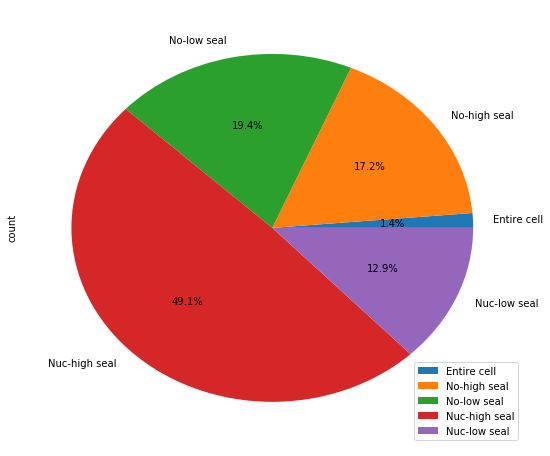

In [15]:
pie_plot(final_M_df)

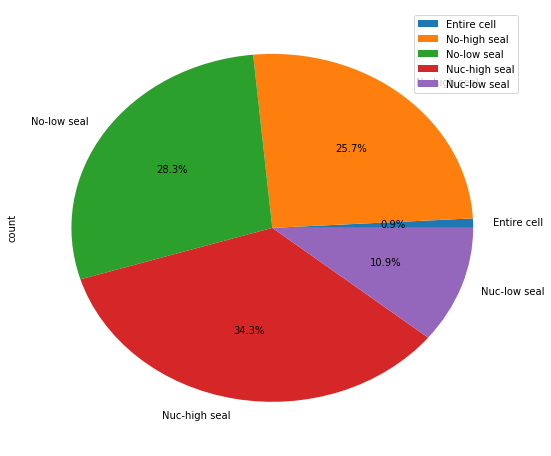

In [16]:
pie_plot(final_H_df)

## Extra (Just messing around with code)

In [17]:
human_df['post_patch'].value_counts()

Nuc-high seal    183
No-low seal      123
No-high seal     108
Nuc-low seal      49
Entire cell        3
Name: post_patch, dtype: int64

In [18]:
final_H_df['post_patch'].value_counts()

Nuc-high seal    79
No-low seal      65
No-high seal     59
Nuc-low seal     25
Entire cell       2
Name: post_patch, dtype: int64

In [19]:
mouse_df['post_patch'].value_counts()

Nuc-high seal    1499
No-high seal      547
No-low seal       475
Nuc-low seal      317
Entire cell        43
Name: post_patch, dtype: int64

In [20]:
final_M_df['post_patch'].value_counts()

Nuc-high seal    649
No-low seal      257
No-high seal     228
Nuc-low seal     171
Entire cell       18
Name: post_patch, dtype: int64

In [21]:
def nuc_count(df):
    #user = str(input('Enter the user number (P#): '))
    user = 'PA'
    
    nh = df[df['post_patch'].str.contains('Nuc-high seal') & 
            df['extraction.tubeID'].str.contains(user)]
    nh = nh['post_patch'].count()

    nl = df[df['post_patch'].str.contains('Nuc-low seal') & 
            df['extraction.tubeID'].str.contains(user)]
    nl = nl['post_patch'].count()

    noh = df[df['post_patch'].str.contains('No-high seal') & 
             df['extraction.tubeID'].str.contains(user)]
    noh = noh['post_patch'].count()

    nol = df[df['post_patch'].str.contains('No-low seal') & 
             df['extraction.tubeID'].str.contains(user)]
    nol = nol['post_patch'].count()

    en = df[df['post_patch'].str.contains('Entire cell') & 
            df['extraction.tubeID'].str.contains(user)]
    en = en['post_patch'].count()
    

    print 'Nucleated:', nh
    print 'Partial nucleated', nl
    print 'Outside-out:', noh
    print 'No seal:', nol
    print 'Entire cell:', en   

In [22]:
nuc_count(mouse_df)

Nucleated: 150
Partial nucleated 62
Outside-out: 12
No seal: 46
Entire cell: 9


In [23]:
nuc_count(final_M_df)

Nucleated: 93
Partial nucleated 37
Outside-out: 7
No seal: 26
Entire cell: 7


In [24]:
nuc_count(human_df)

Nucleated: 2
Partial nucleated 4
Outside-out: 2
No seal: 10
Entire cell: 0


In [25]:
nuc_count(final_H_df)

Nucleated: 2
Partial nucleated 2
Outside-out: 2
No seal: 2
Entire cell: 0


## pie_plot Raw Code

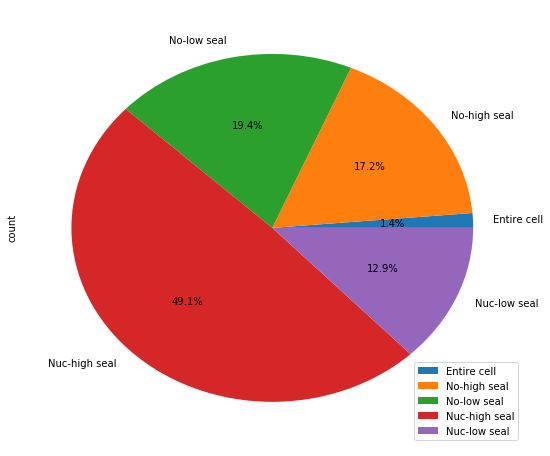

In [26]:
final_M_df1 = final_M_df.loc[:,['post_patch', 'extraction.tubeID']]
final_M_df1 = final_M_df1.groupby('post_patch').count()
final_M_df1 = final_M_df1.rename(columns = {'extraction.tubeID' : 'count'})
final_M_df1 = final_M_df1.pivot_table(values=['count'], 
                                  index=['post_patch'],  
                                  aggfunc='sum')
final_M_df1.plot(kind = 'pie', y= 'count', autopct='%1.1f%%', figsize = (9,8))

## Alternate way to do pie plot all users

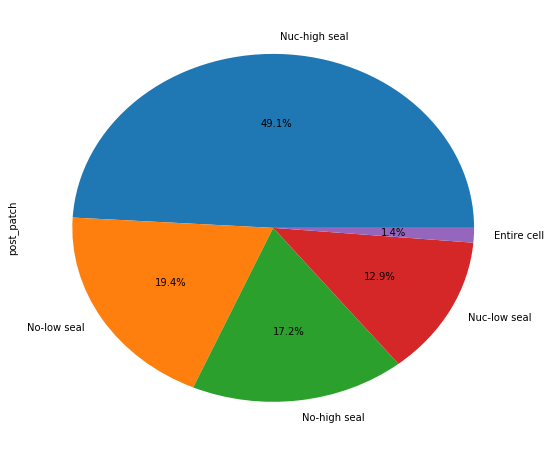

In [27]:
final_M_df['post_patch'].value_counts().plot(kind = 'pie', autopct='%1.1f%%', figsize = (9,8))

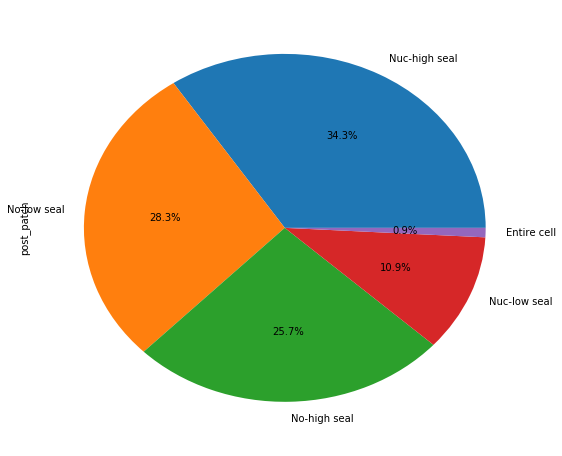

In [28]:
final_H_df['post_patch'].value_counts().plot(kind = 'pie', autopct='%1.1f%%', figsize = (9,8))